<a id='index'> </a>


---

## Table of Contents


1. **[Defining Problem Statement & Data Import](#a)**
    - 1.1 **[Problem Statement](#1.1)**
    - 1.2 **[Importing Libraries](#1.2)**
    - 1.3 **[Importing Data & Creating a Copy](#1.3)**







2. **[Exploratory Data Analysis & Feature Engineering ](#2)**

    - 2.1 **[Checking Shape and Info of data & creating Target Variable](#2.1)**
    - 2.2 **[Checking number of uniques for each column](#2.2)**
    - 2.3 **[Proportion of each category's occurrence as a percentage (value_counts)](#2.3)**
    - 2.4 **[Checking describe of both numerical and catagorical data](#2.4)**
    - 2.5 **[Checking missing  and duplicate values](#2.5)**
    - 2.6 **[Visualization of outliers using boxplot and correlation with heatmap](#2.6)**
    
    
3. **[Data Pre-processing & Feature Engineering](#3)**
    - 3.1 **[Missing values imputation](#3.1)**
    - 3.2 **[Train Test Split & Encoding Categorical Columns](#3.2)**
    - 3.3 **[Effective Methods for Outlier Removal](#3.3)**
        -  3.31 **[DBScan](#3.31)**
        -  3.32 **[Isolation Forest](#3.32)**
        -  3.33 **[Local Outlier Factor](#3.33)**
        -  3.34 **[IQR Method](#3.34)**
        
4. **[Creating Base Model](#4)**
    - 4.1 **[Base Model without outliers](#4.1)**
    - 4.2 **[Base Model with outliers](#4.2)**
    - 4.3 **[KFold Crossvalidation Base Model](#4.3)**
    
5. **[Sequential Neural Network Using Keras & TensorFlow](#5)**
    - 5.1 **[Scaling data with standard scaler](#5.1)**
    - 5.2 **[Building Model Architecture](#5.2)**
    - 5.3 **[Training Model , Metrics Evaluation & Ploting Losses](#5.3)**
    - 5.4 **[Early Stopping ,Plotting Losses &  Model Predictions](#5.4)**
    - 5.5 **[Model Predictions & Visualization of Prediction and Error](#5.5)**
    - 5.6 **[Leading Questions:](#5.6)**
    
6. **[Data clustering , Cluster Analysis & Model Creation](#6)**
    - 6.1 **[Import module & Data Pre-Processing](#6.1)**
    - 6.2 **[Elbow Method & Dividing data into multiple clusters](#6.2)** 
    - 6.3 **[Clustering-based Exploratory Data Analysis](#6.3)**
    - 6.4 **[Hyperparameter Tuning , Building Architechture & Fitting Data](#6.4)**
    
    

<a id='a'></a>
# 1. Defining Problem Statement & Data Import 


<a id='1.1'></a>
## 1.1 Problem Statement

```Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers```

```Porter works with a wide range of restaurants for delivering their items directly to the people.```

```Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.```

#### This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features







-  **Dataset**: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/015/039/original/dataset.csv.zip?1663710760



**Data Dictionary**



```Each row in this file corresponds to one unique delivery. Each column corresponds to a feature as explained below.```


**market_id** : integer id for the market where the restaurant lies



**created_at** : the timestamp at which the order was placed



**actual_delivery_time** : the timestamp when the order was delivered



**store_primary_category** : category for the restaurant



**order_protocol** : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)



**total_items subtotal** : final price of the order



**num_distinct_items** : the number of distinct items in the order



**min_item_price** : price of the cheapest item in the order



**max_item_price** : price of the costliest item in order



**total_onshift_partners** : number of delivery partners on duty at the time order was placed




**total_busy_partners** : number of delivery partners attending to other tasks



**total_outstanding_orders** : total number of orders to be fulfilled at the moment
Process



**[Return to the index](#index)**


<a id='1.2'> </a>

## 1.2 Importing Libraries

In [2]:
%%time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')
import datetime

pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 100

from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score,mean_absolute_percentage_error,mean_squared_error,mean_absolute_error

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf 
from tensorflow.keras.layers import Dense, Activation, Dropout

CPU times: total: 15.6 ms
Wall time: 9 ms


**[Return to the index](#index)**


<a id='1.3'> </a>

## 1.3 Importing Data & Creating a Copy

In [3]:
%%time

raw_data = pd.read_csv('NNdataset.csv')
df = raw_data.copy(deep=True)
df.head()

CPU times: total: 875 ms
Wall time: 1.18 s


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


**[Return to the index](#index)**



=============================================================================================================
<a id='2'></a>
# 2. Exploratory Data Analysis & Feature Engineering
---

<a id='2.1'> </a>

## 2.1 Checking Shape and Info of data & creating Target Variable

In [4]:
df.shape

(197428, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [6]:
%%time


df['created_at'] = df['created_at'].astype('datetime64')
df['actual_delivery_time'] = df['actual_delivery_time'].astype('datetime64')
df['delivery_time_targetvar'] = (df['actual_delivery_time'] - df['created_at'])/ pd.Timedelta(minutes=1)
df['created_at_hour'] = df['created_at'].dt.hour
df['created_at_day'] = df['created_at'].dt.day

CPU times: total: 562 ms
Wall time: 696 ms


**[Return to the index](#index)**


<a id='2.2'> </a>

## 2.2 Checking number of uniques for each column

In [7]:
%%time

# nuniques for every column

for i in df.columns:
    print(i, ':', df[i].nunique(), '\n')

market_id : 6 

created_at : 180985 

actual_delivery_time : 178110 

store_id : 6743 

store_primary_category : 74 

order_protocol : 7 

total_items : 57 

subtotal : 8368 

num_distinct_items : 20 

min_item_price : 2312 

max_item_price : 2652 

total_onshift_partners : 172 

total_busy_partners : 159 

total_outstanding_orders : 281 

delivery_time_targetvar : 7134 

created_at_hour : 19 

created_at_day : 30 

CPU times: total: 156 ms
Wall time: 267 ms


- ***_nuniques for every column_***

---

**[Return to the index](#index)**


<a id='2.3'> </a>

## 2.3 Proportion of each category's occurrence as a percentage

                                                   MARKET_ID


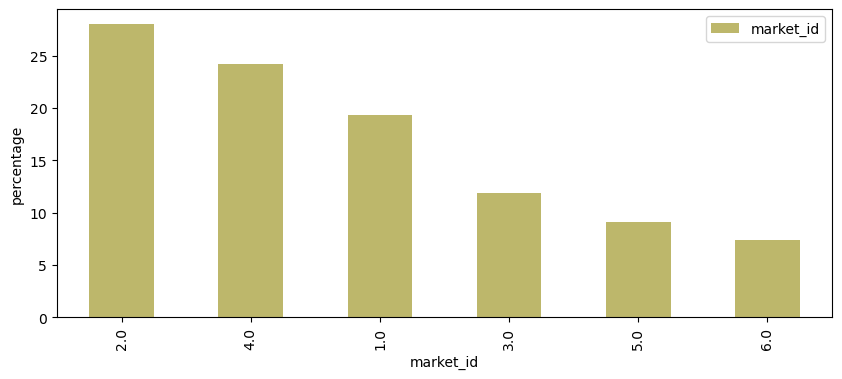

                                                   ORDER_PROTOCOL


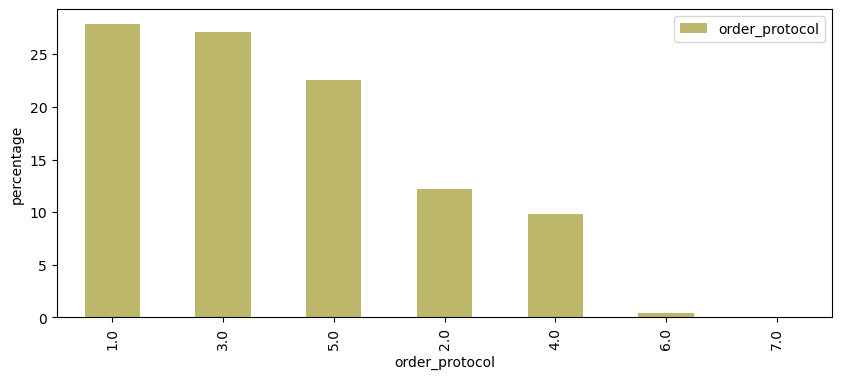

                                                   TOTAL_ITEMS


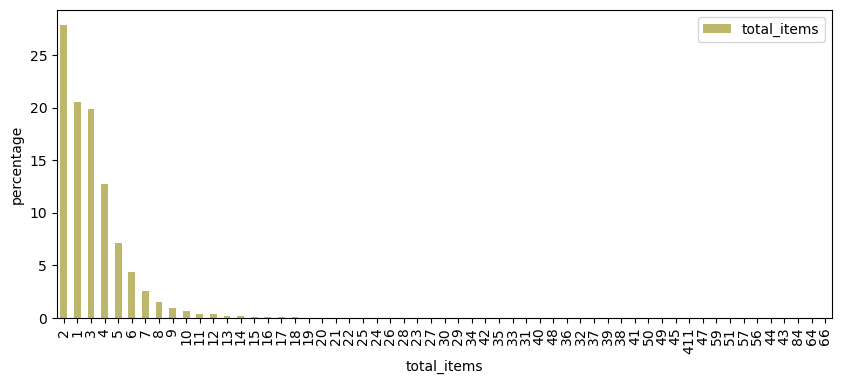

                                                   NUM_DISTINCT_ITEMS


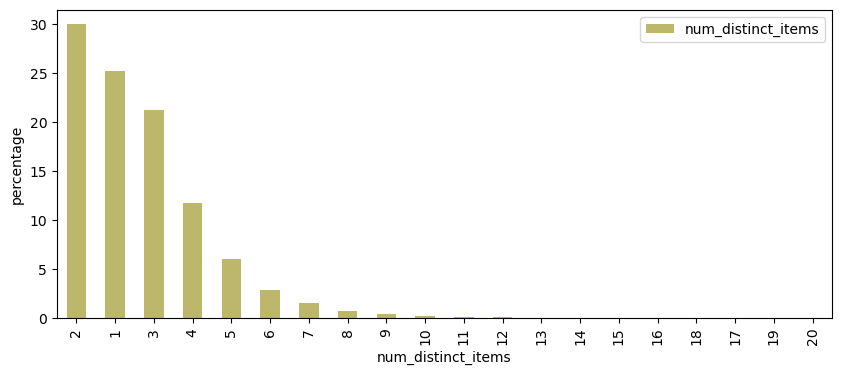

                                                   CREATED_AT_HOUR


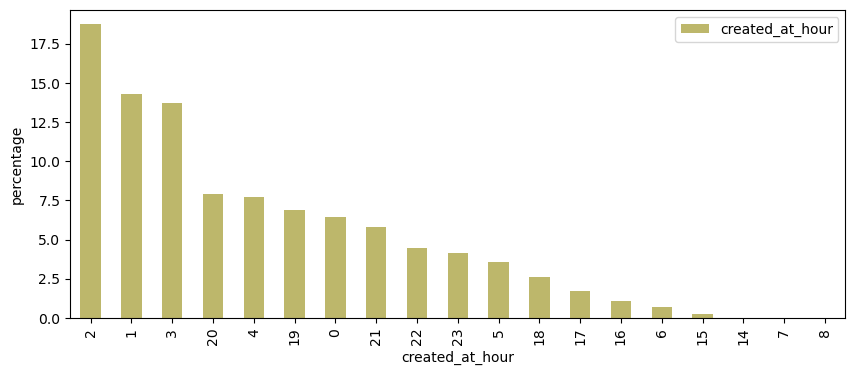

                                                   CREATED_AT_DAY


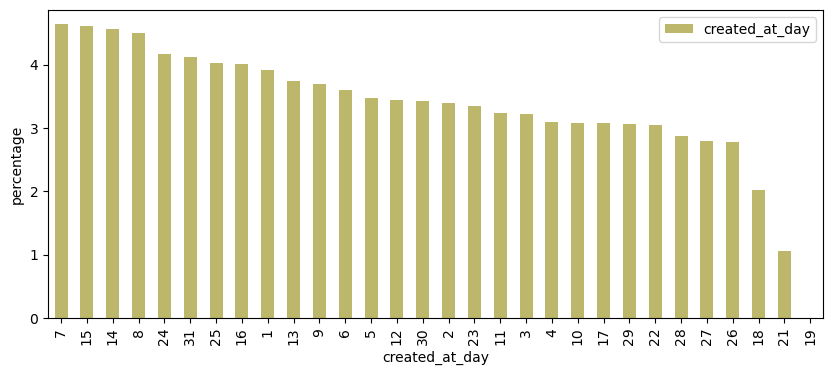

CPU times: total: 5.22 s
Wall time: 5.58 s


In [8]:
%%time
# value_counts

for i in df.columns:
    if df[i].nunique() < 58:
        print(' ' * 50, i.upper())
        pd.DataFrame(df[i].value_counts(normalize=True) * 100).plot(
            kind='bar', color='darkkhaki', figsize=(10, 4))
        plt.xlabel(i)
        plt.ylabel('percentage')
        plt.show()

- ***_Value counts of limited catagory columns_***

----

**[Return to the index](#index)**


<a id='2.4'> </a>

## 2.4 Checking describe of both numerical and catagorical data

In [9]:

# describe

df.describe(percentiles=[.01,.25,.50,.75,.99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
market_id,196441.0,2.978706,1.524867,1.000000,1.0,2.000000,3.000000,4.00,6.000000,6.00
order_protocol,196433.0,2.882352,1.503771,1.000000,1.0,1.000000,3.000000,4.00,5.000000,7.00
total_items,197428.0,3.196391,2.666546,1.000000,1.0,2.000000,3.000000,4.00,12.000000,411.00
subtotal,197428.0,2682.331402,1823.093688,0.000000,529.0,1400.000000,2200.000000,3395.00,9468.650000,27100.00
num_distinct_items,197428.0,2.670791,1.630255,1.000000,1.0,1.000000,2.000000,3.00,8.000000,20.00
min_item_price,197428.0,686.218470,522.038648,-86.000000,0.0,299.000000,595.000000,949.00,2500.000000,14700.00
max_item_price,197428.0,1159.588630,558.411377,0.000000,259.0,800.000000,1095.000000,1395.00,3077.000000,14700.00
total_onshift_partners,181166.0,44.808093,34.526783,-4.000000,0.0,17.000000,37.000000,65.00,136.000000,171.00
total_busy_partners,181166.0,41.739747,32.145733,-5.000000,0.0,15.000000,34.000000,62.00,126.000000,154.00
total_outstanding_orders,181166.0,58.050065,52.661830,-6.000000,0.0,17.000000,41.000000,85.00,213.000000,285.00


In [10]:

df.describe(include=object).T

,count,unique,top,freq
store_id,197428,6743,d43ab110ab2489d6b9b2caa394bf920f,937
store_primary_category,192668,74,american,19399


- ***_Describe of both numerical and object type data_***


---


**[Return to the index](#index)**


<a id='2.5'> </a>

## 2.5 Checking missing  and duplicate values

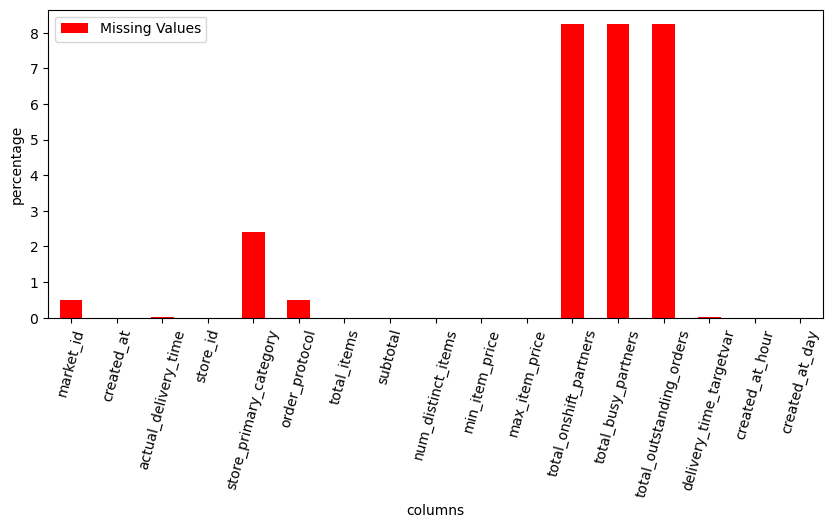

In [11]:

# missing values 

pd.DataFrame(df.isnull().mean() * 100).rename(columns={
    0: 'Missing Values'
}).plot(kind='bar', color='red', figsize=(10, 4))
plt.xlabel('columns')
plt.ylabel('percentage')
plt.xticks(rotation=75);

- ***_Missing values in percentage_***


---

In [12]:
df.duplicated().sum()

0

- ***_No Duplicates Present_***


---

**[Return to the index](#index)**


<a id='2.6'> </a>

## 2.6 Visualization of outliers using boxplot and correlation with heatmap

In [13]:
%%time

# removing outlier from target variable
df = df[df.delivery_time_targetvar < df.delivery_time_targetvar.quantile(.99)]
df['delivery_time_targetvar'] = round(df['delivery_time_targetvar'],2)  

CPU times: total: 78.1 ms
Wall time: 138 ms


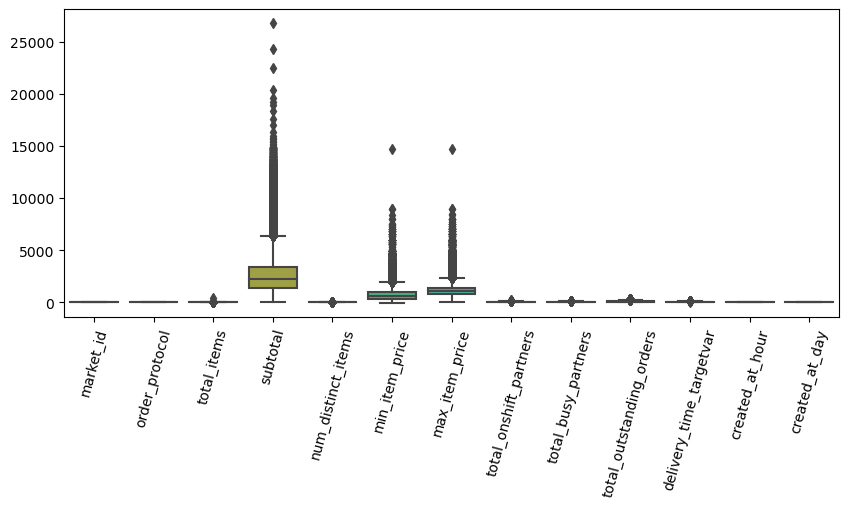

In [14]:

plt.figure(figsize=(10,4))
sns.boxplot(data = df)
plt.xticks(rotation=75)
plt.show()

- ***_Visualization of outliers_***


---

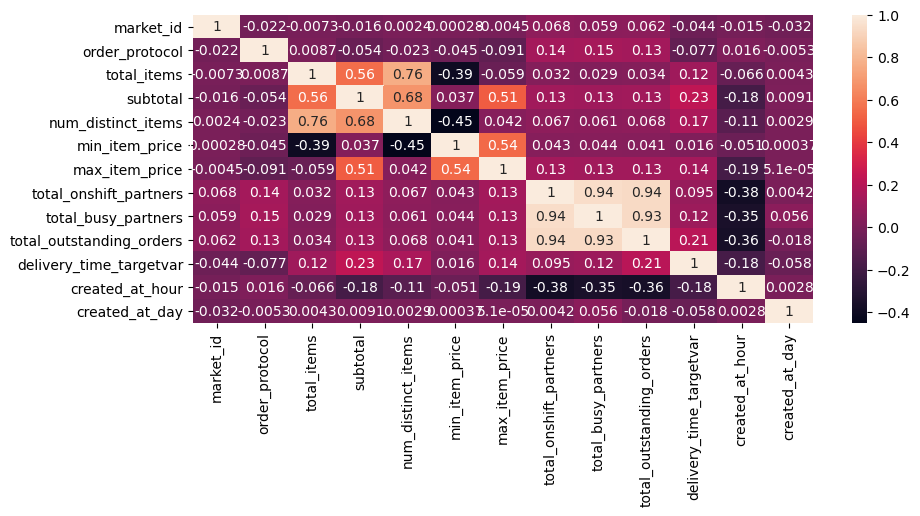

In [15]:

plt.figure(figsize=(10,4))
sns.heatmap(df.corr(),annot=True)
plt.show()

***_Visualization of Correlation with Heatmap_***

---

**[Return to the index](#index)**


=============================================================================================================
<a id='3'></a>
# 3. Data Pre-processing  & Feature Engineering 

<a id='3.1'> </a>
## 3.1 Missing values imputation

In [16]:
%%time

df['total_onshift_partners'] = df['total_onshift_partners'].fillna(df.groupby('created_at_hour')['total_onshift_partners'].transform('mean'))
df['total_busy_partners'] = df['total_busy_partners'].fillna(df.groupby('created_at_hour')['total_busy_partners'].transform('mean'))
df['total_outstanding_orders'] = df['total_outstanding_orders'].fillna(df.groupby('created_at_hour')['total_outstanding_orders'].transform('mean'))

CPU times: total: 31.2 ms
Wall time: 47 ms


In [17]:
%%time

df['market_id'] = df['market_id'].fillna(0)
df['order_protocol'] = df['order_protocol'].fillna(0)
df['store_primary_category'] = df['store_primary_category'].fillna('other')

CPU times: total: 46.9 ms
Wall time: 43 ms


In [18]:
%%time

df = df[~df['actual_delivery_time'].isna()]
df.drop(['created_at','actual_delivery_time'],axis=1,inplace=True)

CPU times: total: 78.1 ms
Wall time: 79.6 ms


**[Return to the index](#index)**

<a id='3.2'> </a>
## 3.2 Train Test Split & Encoding Categorical Columns

In [19]:
%%time
# Train test split

X = df.drop('delivery_time_targetvar',axis=1)
y = df.delivery_time_targetvar

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

CPU times: total: 125 ms
Wall time: 109 ms


In [20]:
%%time

encoder = ce.TargetEncoder(return_df=True)
X_train = encoder.fit_transform(X_train,y_train)
X_test = encoder.transform(X_test)
X_train['store_primary_category'] = round(X_train['store_primary_category'],2)

CPU times: total: 969 ms
Wall time: 969 ms


In [21]:
X_train['nf6_tbp_too_si'] = ((X_train['total_busy_partners']-X_train['total_outstanding_orders'])*X_train['store_id']).round(2)
X_train['nf8_tbp_too_top'] = ((X_train['total_busy_partners']-X_train['total_outstanding_orders'])+X_train['total_onshift_partners']).round(2)


In [22]:
X_test['nf6_tbp_too_si'] = ((X_test['total_busy_partners']-X_test['total_outstanding_orders'])*X_test['store_id']).round(2)
X_test['nf8_tbp_too_top'] = ((X_test['total_busy_partners']-X_test['total_outstanding_orders'])+X_test['total_onshift_partners']).round(2)


In [23]:
X_train['order_delivry_ratio'] = (X_train.total_busy_partners+ X_train.total_onshift_partners/(X_train.total_outstanding_orders+1)).round(2)
X_test['order_delivry_ratio'] = (X_test.total_busy_partners+ X_test.total_onshift_partners/(X_test.total_outstanding_orders+1)).round(2)

X_train.drop(columns=['total_busy_partners','total_onshift_partners','total_outstanding_orders'])
X_test.drop(columns=['total_busy_partners','total_onshift_partners','total_outstanding_orders'])

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,created_at_hour,created_at_day,nf6_tbp_too_si,nf8_tbp_too_top,order_delivry_ratio
176539,3.0,61.348780,49.844134,3.0,3,4207,3,1099,1379,1,2,0.00,0.0,0.00
174789,2.0,51.204583,43.972306,1.0,1,995,1,995,995,22,8,-307.23,59.0,63.93
27195,1.0,60.031666,48.125912,3.0,5,3565,3,275,1295,2,28,-600.32,28.0,38.78
144143,6.0,48.825464,46.988426,5.0,2,1910,2,700,1210,4,8,-97.65,26.0,26.97
153104,2.0,38.191579,43.029409,4.0,5,1915,3,119,479,23,24,381.92,29.0,27.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126404,2.0,48.790783,46.355799,1.0,3,2677,3,399,1099,1,18,-195.16,22.0,24.90
64590,2.0,48.298383,46.659661,4.0,2,838,2,249,589,2,8,-3767.27,54.0,99.74
20042,4.0,54.235161,50.600463,2.0,2,1590,2,395,1195,2,6,-1464.35,49.0,40.13
28132,1.0,46.229643,45.671137,5.0,2,3740,1,1795,1795,2,25,-416.07,58.0,70.84


In [24]:
X_train.replace([np.inf, -np.inf], 0, inplace=True)
# X_train.dropna(inplace=True)

X_test.replace([np.inf, -np.inf], 0, inplace=True)
# X_test.dropna(inplace=True)

***Feature Engineering***


---

<a id='3.3'> </a>
# 3.3 Effective Methods for Outlier Removal 

<a id='3.31'> </a>

### 3.31 DBSCAN

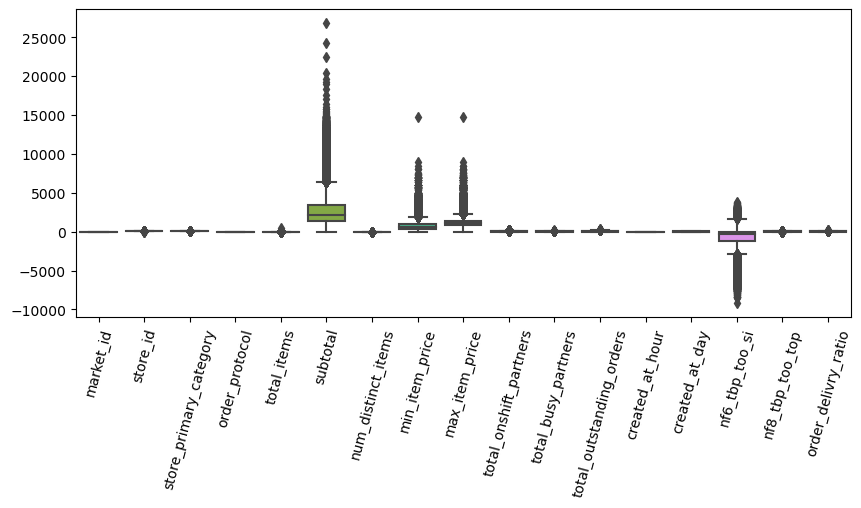

In [25]:


dbs_Xtrain = X_train.copy(deep=True)
plt.figure(figsize=(10,4))
sns.boxplot(data=dbs_Xtrain)
plt.xticks(rotation=75)
plt.show()

In [26]:
X_train

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,created_at_hour,created_at_day,nf6_tbp_too_si,nf8_tbp_too_top,order_delivry_ratio
28604,1.0,41.538421,43.03,4.0,1,2699,1,2699,2699,15.0,16.0,23.0,2,29,-290.77,8.0,16.62
23902,1.0,55.800270,47.80,1.0,2,2400,2,1100,1300,0.0,0.0,0.0,4,31,0.00,0.0,0.00
184631,2.0,55.271471,46.90,1.0,3,4600,3,1195,1935,60.0,60.0,84.0,3,9,-1326.52,36.0,60.71
37307,4.0,51.243505,49.84,3.0,6,7479,5,499,1459,31.0,48.0,20.0,21,25,1434.82,59.0,49.48
189622,2.0,49.895091,49.84,1.0,2,3045,2,895,2150,38.0,35.0,36.0,0,7,-49.90,37.0,36.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121106,0.0,44.505897,46.66,1.0,1,1247,1,1247,1247,78.0,67.0,69.0,1,6,-89.01,76.0,68.11
104782,2.0,41.575345,44.83,1.0,2,1291,2,475,816,40.0,34.0,33.0,21,31,41.58,41.0,35.18
133272,4.0,45.819333,49.84,5.0,4,7000,4,1400,2000,126.0,123.0,203.0,2,14,-3665.55,46.0,123.62
148361,5.0,51.827996,49.84,1.0,2,2198,2,599,699,23.0,10.0,12.0,1,7,-103.66,21.0,11.77


In [27]:
# %%time

dbsc = DBSCAN(eps = 110, min_samples = 11).fit(dbs_Xtrain)

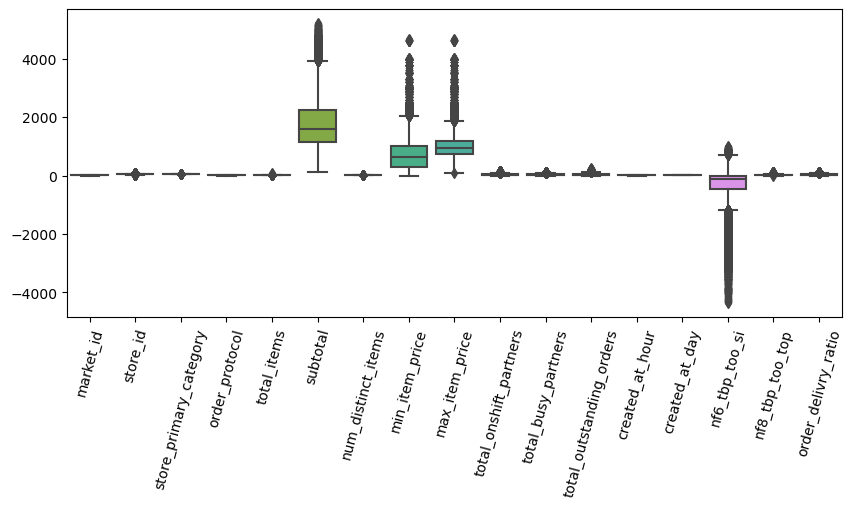

In [28]:

# Get the mask for the non-outlier points
non_outliers_mask = dbsc.labels_ != -1
non_outliers_db = dbs_Xtrain[non_outliers_mask]

# Create a boxplot of the non-outlier points
plt.figure(figsize=(10,4))
sns.boxplot(data=non_outliers_db)
plt.xticks(rotation=75)
plt.show()

In [29]:
len(non_outliers_db),len(X_train)

(92813, 175901)

**[Return to the index](#index)**

<a id='3.32'> </a>

### 3.32 Isolation Forest

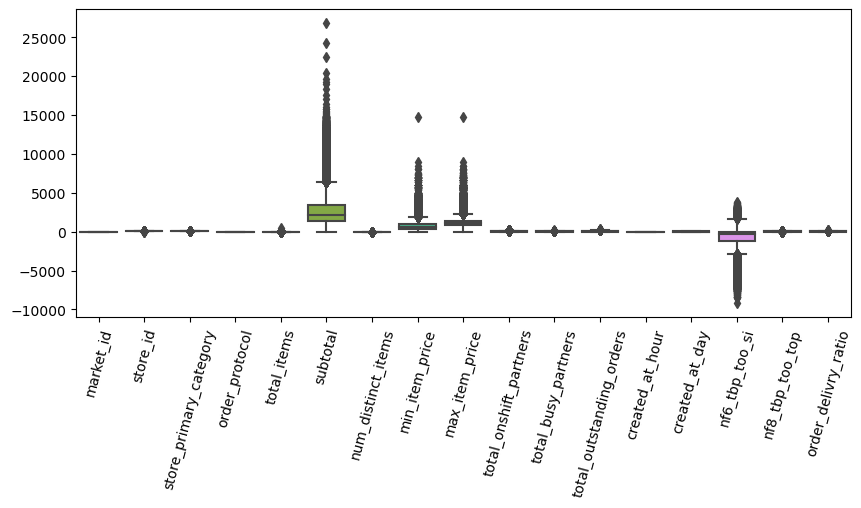

In [30]:

isf_Xtrain = X_train.copy(deep=True)
plt.figure(figsize=(10,4))
sns.boxplot(data=isf_Xtrain)
plt.xticks(rotation=75)
plt.show()

In [31]:
%%time

isf = IsolationForest(contamination = 0.10, random_state=0, n_estimators=500).fit_predict(isf_Xtrain)


CPU times: total: 1min 54s
Wall time: 2min 20s


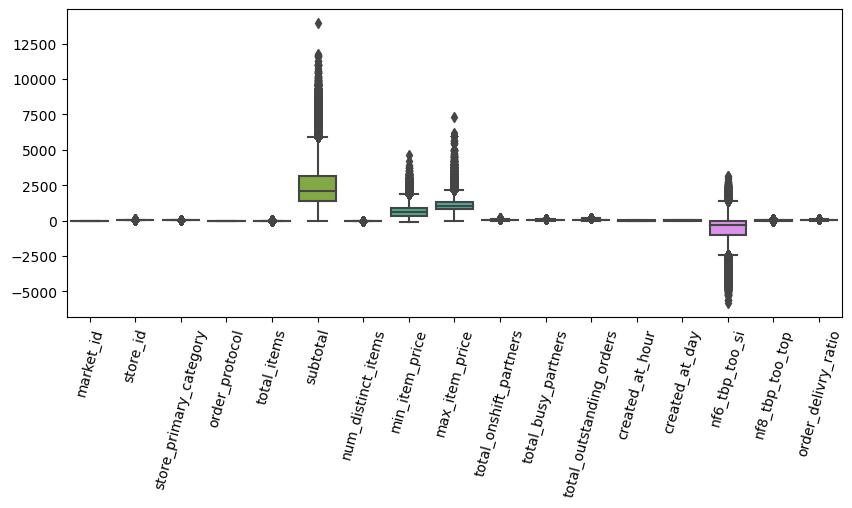

In [32]:

# Get the mask for the non-outlier points
non_outliers_mask = isf != -1
non_outliers_isf = isf_Xtrain[non_outliers_mask]

# Create a boxplot of the non-outlier points
plt.figure(figsize=(10,4))
sns.boxplot(data=non_outliers_isf)
plt.xticks(rotation=75)
plt.show()

In [33]:
len(non_outliers_isf),len(X_train)

(158311, 175901)

**[Return to the index](#index)**

<a id='3.33'> </a>

### 3.33 Local Outlier Factor

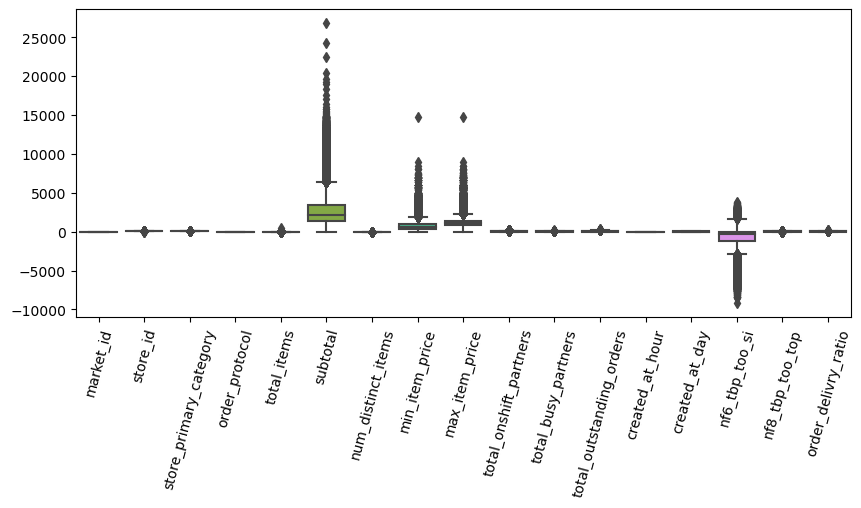

In [34]:


lof_Xtrain = X_train.copy(deep=True)
plt.figure(figsize=(10,4))
sns.boxplot(data=lof_Xtrain)
plt.xticks(rotation=75);

In [35]:
%%time

lof = LocalOutlierFactor(n_neighbors=5, contamination=0.10).fit_predict(lof_Xtrain)


CPU times: total: 6min 29s
Wall time: 3min 13s


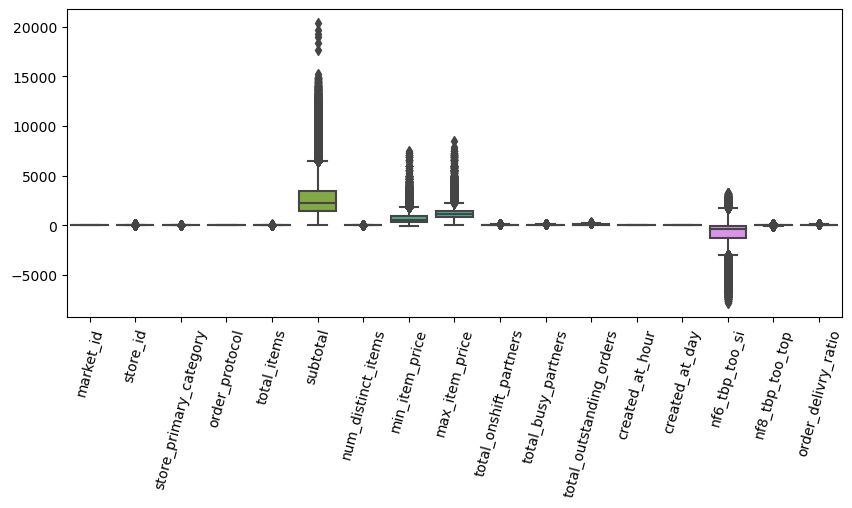

In [36]:

# Get the mask for the non-outlier points
non_outliers_mask = lof != -1
non_outliers_lof = lof_Xtrain[non_outliers_mask]

# Create a boxplot of the non-outlier points
plt.figure(figsize=(10,4))
sns.boxplot(data=non_outliers_lof)
plt.xticks(rotation=75);

In [37]:
len(non_outliers_lof),len(X_train)

(158311, 175901)

**[Return to the index](#index)**

<a id='3.34'> </a>

### 3.34 IQR Method

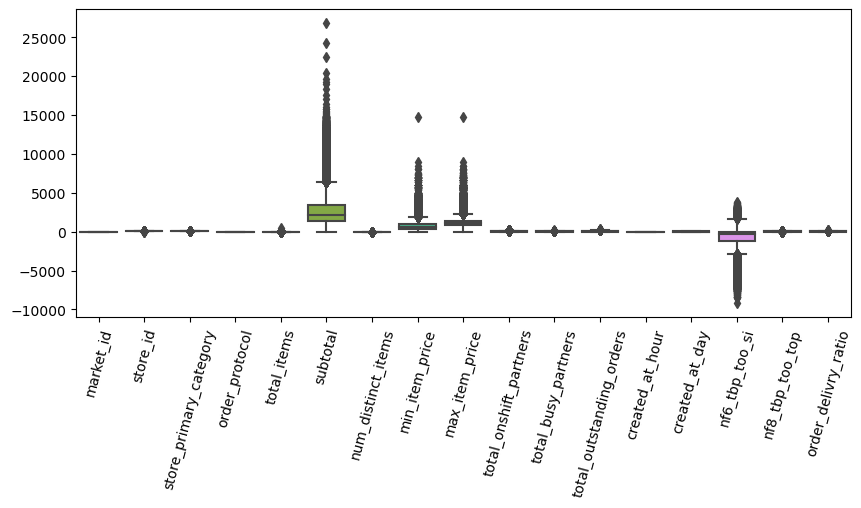

In [38]:

iqr_X = X_train.copy(deep=True)
plt.figure(figsize=(10,4))
sns.boxplot(data=iqr_X)
plt.xticks(rotation=75);

In [39]:
def outlier_removal_with_iqr(iqr_X,i):
    q1 = iqr_X[i].quantile(.25) 
    q3 = iqr_X[i].quantile(.75) 
    iqr = q3 - q1
    max_ = q3 + 1.5*iqr
    min_ = q1 - 1.5*iqr
    return iqr_X[i].clip(min_,max_)


In [40]:
%%time

# rounding features to two decimal point
iqr_X['store_primary_category'] = round(iqr_X['store_primary_category'],2)

# removing outliers
for i in iqr_X.columns:
    iqr_X[i]=outlier_removal_with_iqr(iqr_X,i)


CPU times: total: 469 ms
Wall time: 579 ms


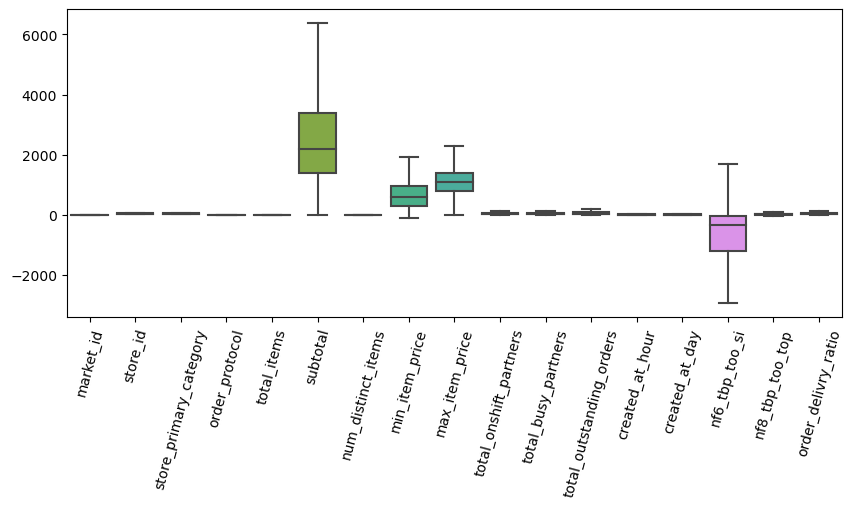

In [41]:

plt.figure(figsize=(10,4))
sns.boxplot(data=iqr_X)
plt.xticks(rotation=75);

In [42]:
len(iqr_X),len(X_train)

(175901, 175901)

---
- ### ***_Based on the comparison of the above four plots, it appears that IQR Method is the most effective method for removing outliers from our data, as it  retains all the values by clipping with an upper and lower bound._***


---


---


---

**[Return to the index](#index)**

<a id='4'> </a>

# 4. Creating Base Model

In [43]:
def metric(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    n = X_test.shape[0]  
    p = X_test.shape[1]  
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    print('test_r2_score :', r2,'\n')
    print('adjusted_r2_score :', adj_r2,'\n')
    print('root_mean_squared_error :',np.sqrt(mean_squared_error(y_test, y_pred)),'\n')
    print('mean_absolute_percentage_error :',mean_absolute_percentage_error(y_test, y_pred)*100,'\n')
    print('mean_absolute_error :',mean_absolute_error(y_test, y_pred),'\n')



<a id='4.1'> </a>

## 4.1 Base Model without outliers

In [44]:
# X_test.isin([np.inf, -np.inf]).sum()

In [45]:
%%time

regr = RandomForestRegressor(max_depth=10, random_state=42,bootstrap =True,n_estimators=100,n_jobs=-1)
regr.fit(iqr_X, y_train)

CPU times: total: 4min 18s
Wall time: 1min 53s


RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)

In [46]:
X_train.head()

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,created_at_hour,created_at_day,nf6_tbp_too_si,nf8_tbp_too_top,order_delivry_ratio
28604,1.0,41.538421,43.03,4.0,1,2699,1,2699,2699,15.0,16.0,23.0,2,29,-290.77,8.0,16.62
23902,1.0,55.800270,47.80,1.0,2,2400,2,1100,1300,0.0,0.0,0.0,4,31,0.00,0.0,0.00
184631,2.0,55.271471,46.90,1.0,3,4600,3,1195,1935,60.0,60.0,84.0,3,9,-1326.52,36.0,60.71
37307,4.0,51.243505,49.84,3.0,6,7479,5,499,1459,31.0,48.0,20.0,21,25,1434.82,59.0,49.48
189622,2.0,49.895091,49.84,1.0,2,3045,2,895,2150,38.0,35.0,36.0,0,7,-49.90,37.0,36.03


In [47]:
X_test.head()

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,created_at_hour,created_at_day,nf6_tbp_too_si,nf8_tbp_too_top,order_delivry_ratio
176539,3.0,61.348780,49.844134,3.0,3,4207,3,1099,1379,0.0,0.0,0.0,1,2,0.00,0.0,0.00
174789,2.0,51.204583,43.972306,1.0,1,995,1,995,995,65.0,63.0,69.0,22,8,-307.23,59.0,63.93
27195,1.0,60.031666,48.125912,3.0,5,3565,3,275,1295,38.0,38.0,48.0,2,28,-600.32,28.0,38.78
144143,6.0,48.825464,46.988426,5.0,2,1910,2,700,1210,28.0,26.0,28.0,4,8,-97.65,26.0,26.97
153104,2.0,38.191579,43.029409,4.0,5,1915,3,119,479,19.0,26.0,16.0,23,24,381.92,29.0,27.12


In [48]:
%%time

y_pred = regr.predict(X_test)

CPU times: total: 391 ms
Wall time: 186 ms


In [49]:
print('train_r2_score',r2_score(y_train,regr.predict(iqr_X)),'\n')

metric(y_test, y_pred)

train_r2_score 0.39922228016775485 

test_r2_score : 0.3131884958988006 

adjusted_r2_score : 0.31259056505587957 

root_mean_squared_error : 13.412774754215635 

mean_absolute_percentage_error : 24.480553607553386 

mean_absolute_error : 10.332514890959885 



---
***_Score of Base Model without Outliers_***

---

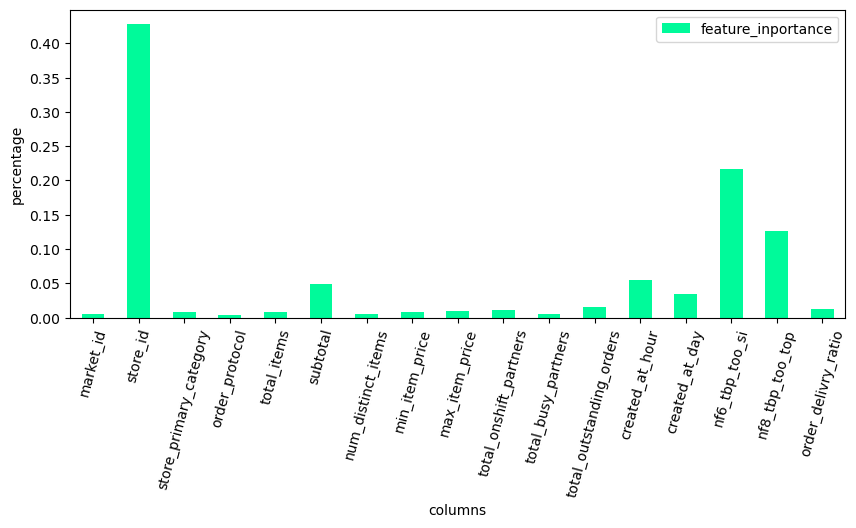

In [50]:

((pd.DataFrame(regr.feature_importances_.reshape(-1, 1).T,
              columns=X_train.columns).T).rename(columns={0:'feature_inportance'})).plot(kind='bar',
                                               color='mediumspringgreen',
                                               figsize=(10, 4))
plt.xlabel('columns')
plt.ylabel('percentage')
plt.xticks(rotation=75);

---
***_Score of Base Model without Outliers_***

---

**[Return to the index](#index)**

<a id='4.2'> </a>
## 4.2 Base Model with outliers

In [51]:
%%time

regr1 = RandomForestRegressor(max_depth=12, random_state=42,bootstrap =True,n_estimators=150,n_jobs=-1)
regr1.fit(X_train, y_train)

CPU times: total: 7min 57s
Wall time: 3min 11s


RandomForestRegressor(max_depth=12, n_estimators=150, n_jobs=-1,
                      random_state=42)

In [52]:
%%time

y_pred1 = regr1.predict(X_test)

CPU times: total: 797 ms
Wall time: 270 ms


In [53]:
%%time

print('train_r2_score',r2_score(y_train,regr1.predict(X_train)),'\n')
metric(y_test, y_pred1)

train_r2_score 0.4681593977940577 

test_r2_score : 0.3249956730130933 

adjusted_r2_score : 0.32440802137388725 

root_mean_squared_error : 13.29698348277975 

mean_absolute_percentage_error : 24.196245167455956 

mean_absolute_error : 10.224523487951652 

CPU times: total: 6.95 s
Wall time: 2.61 s


---
***_Score of Base Model with Outliers_***

---

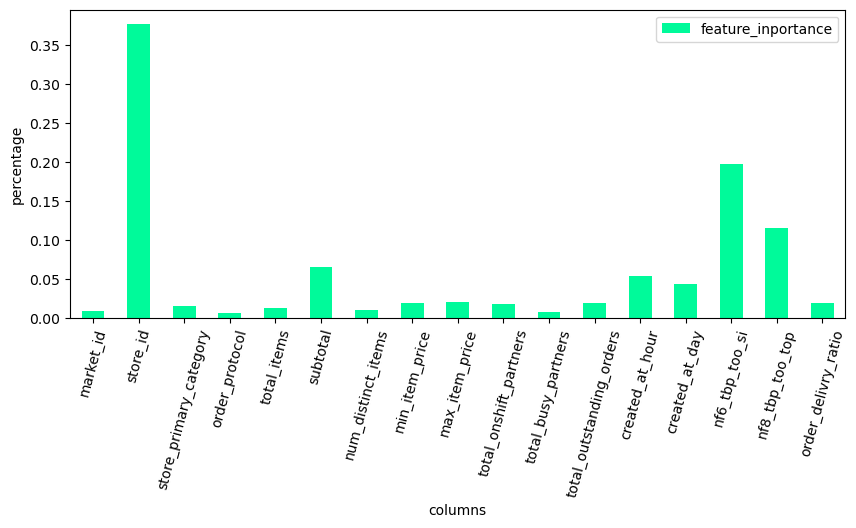

In [54]:

((pd.DataFrame(regr1.feature_importances_.reshape(-1, 1).T,
              columns=X_train.columns).T).rename(columns={0:'feature_inportance'})).plot(kind='bar',
                                               color='mediumspringgreen',
                                               figsize=(10, 4))
plt.xlabel('columns')
plt.ylabel('percentage')
plt.xticks(rotation=75);

---
***Feature Importances of Base Model with Outliers_***

---

**[Return to the index](#index)**

<a id='4.3'> </a>


## 4.3 KFold Crossvalidation Base Model

In [55]:
%%time

from sklearn.metrics import make_scorer
import numpy as np

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Define a custom scorer using the MAPE function
scorer = make_scorer(mape, greater_is_better=False)

CPU times: total: 0 ns
Wall time: 0 ns


In [56]:
%%time

regr2 = RandomForestRegressor(max_depth=20, random_state=42,bootstrap =True,n_estimators=100,n_jobs=-1)
regr2.fit(X_train, y_train)

CPU times: total: 9min 12s
Wall time: 3min 38s


RandomForestRegressor(max_depth=20, n_jobs=-1, random_state=42)

In [57]:
%%time

kf = KFold(n_splits=5,shuffle=True,random_state=42)

CPU times: total: 0 ns
Wall time: 0 ns


In [58]:
%%time

score = cross_val_score(regr2,X_train,y_train,cv=kf,scoring=scorer)

CPU times: total: 25.8 s
Wall time: 16min 36s


In [59]:
score = score*-1

In [60]:
print("scores :",score,'\n')
print("mean_scores :",score.mean(),'\n')
print("standard_dev_scores :",score.std(),'\n')

scores : [23.68487451 23.74714591 23.74115692 23.60566681 23.61653064] 

mean_scores : 23.679074956967327 

standard_dev_scores : 0.059702609538184105 



**[Return to the index](#index)**

---
- ### ***_On average, our base model produces a 25% error, regardless of whether outliers are included or not._***


---


---


---

<a id='5'> </a>

# 5. Sequential Neural Network Using Keras & TensorFlow

<a id='5.1'> </a>

## 5.1 Scaling data with standard scaler

In [61]:
X_train_nonscaled = X_train.copy()
X_test_nonscaled = X_test.copy()

In [62]:
%%time

# Normalizing train data 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train ,columns=X_test.columns)

# Transforming test data 
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test ,columns=X_train.columns)

CPU times: total: 156 ms
Wall time: 263 ms


In [63]:
X_test.head()

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,created_at_hour,created_at_day,nf6_tbp_too_si,nf8_tbp_too_top,order_delivry_ratio
0,0.022440,2.137215,1.375272,0.086886,-0.071546,0.841467,0.204461,0.790712,0.394779,-1.341150,-1.342785,-1.138202,-0.864194,-1.449784,0.654786,-1.293983,-1.374659
1,-0.629660,0.648170,-1.289557,-1.234289,-0.815534,-0.924467,-1.024835,0.591566,-0.292729,0.598822,0.677149,0.212418,1.558746,-0.797196,0.392415,1.369068,0.681102
2,-1.281760,1.943878,0.595486,0.086886,0.672443,0.488500,0.204461,-0.787141,0.244387,-0.207012,-0.124412,-0.198640,-0.748816,1.378099,0.142120,-0.030162,-0.127632
3,1.978739,0.298945,0.079257,1.408061,-0.443540,-0.421406,-0.410187,0.026679,0.092204,-0.505469,-0.509161,-0.590124,-0.518060,-0.797196,0.571394,-0.120435,-0.507400
4,-0.629660,-1.261980,-1.717475,0.747474,0.672443,-0.418658,0.204461,-1.085861,-1.216568,-0.774081,-0.509161,-0.825014,1.674124,0.943040,0.980942,0.014974,-0.502576


**[Return to the index](#index)**

In [64]:
# stop

<a id='5.2'> </a>

## 5.2 Building Model Architecture

In [65]:
def build_model():
    model = keras.Sequential([
        layers.Dense(18, activation=tf.nn.leaky_relu, input_shape=[len(X_train.keys())]),
        layers.Dense(36, activation=tf.nn.leaky_relu),
        layers.BatchNormalization(),
        layers.Dense(72, activation=tf.nn.leaky_relu),
        layers.Dense(144, activation=tf.nn.leaky_relu),
        layers.BatchNormalization(),
        layers.Dense(288, activation=tf.nn.leaky_relu),
        layers.Dropout(0.1),
        layers.Dense(576, activation=tf.nn.leaky_relu),
        layers.BatchNormalization(),
        layers.Dense(288, activation=tf.nn.leaky_relu),
        layers.Dense(144, activation=tf.nn.leaky_relu),
        layers.BatchNormalization(),
        layers.Dense(72, activation=tf.nn.leaky_relu),
        layers.Dropout(0.1),
        layers.Dense(36, activation=tf.nn.leaky_relu),
        layers.BatchNormalization(),
        layers.Dense(18, activation=tf.nn.leaky_relu),

        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam()

    model.compile(loss='msle',
                  optimizer=optimizer,
                  metrics = ['mae','mse','mape'])
    return model

In [66]:
model = build_model()

In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                324       
                                                                 
 dense_1 (Dense)             (None, 36)                684       
                                                                 
 batch_normalization (BatchN  (None, 36)               144       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 72)                2664      
                                                                 
 dense_3 (Dense)             (None, 144)               10512     
                                                                 
 batch_normalization_1 (Batc  (None, 144)              576       
 hNormalization)                                        

**[Return to the index](#index)**

<a id='5.3'> </a>

## 5.3 Training Model , Metrics Evaluation & Ploting Losses

In [68]:
%%time

class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:print('')
        print('.',end='')
EPOCHS = 500

history = model.fit(
X_train,y_train,
epochs=EPOCHS, validation_split=0.2,verbose=0,
callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................CPU times: total: 16h 21min 37s
Wall time: 7h 13min 51s


In [69]:
%%time

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist['rmse'] = np.sqrt(hist.mse)
hist['val_rmse'] = np.sqrt(hist.val_mse)
hist.tail()

CPU times: total: 78.1 ms
Wall time: 108 ms


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch,rmse,val_rmse
495,0.069766,9.717789,166.645630,21.868795,0.072405,9.917941,172.321762,22.401691,495,12.909130,13.127138
496,0.069965,9.733514,167.149445,21.902700,0.072577,9.932161,173.733002,22.345509,496,12.928629,13.180782
497,0.069993,9.741125,167.261719,21.917093,0.072312,9.911817,170.786057,22.559549,497,12.932970,13.068514
498,0.069864,9.724737,167.025009,21.880579,0.072668,9.947181,173.322617,22.460850,498,12.923816,13.165205
499,0.069892,9.743390,167.108109,21.913534,0.072471,9.916177,170.248352,22.605402,499,12.927030,13.047925


In [70]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist['rmse'] = np.sqrt(hist.mse)
    hist['val_rmse'] = np.sqrt(hist.val_mse)
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Mins/order]')
    plt.plot(hist['epoch'], hist['mae'],
             label='Train Error',color='b')
    plt.plot(hist['epoch'], hist['val_mae'],
         label='Val Error',color='g')
    plt.legend()
    plt.ylim([8,15])
    
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [Mins/order^2]')
    plt.plot(hist['epoch'], hist['mse'],
             label='Train Error',color='b')
    plt.plot(hist['epoch'], hist['val_mse'],
         label='Val Error',color='g')
    plt.legend()
    plt.ylim([100,400])
    
    
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epoch')
    plt.ylabel('Root Mean Square Error [Mins/order]')
    plt.plot(hist['epoch'], hist['rmse'],
             label='Train Error',color='b')
    plt.plot(hist['epoch'], hist['val_rmse'],
         label='Val Error',color='g')
    plt.legend()
    plt.ylim([10,20])


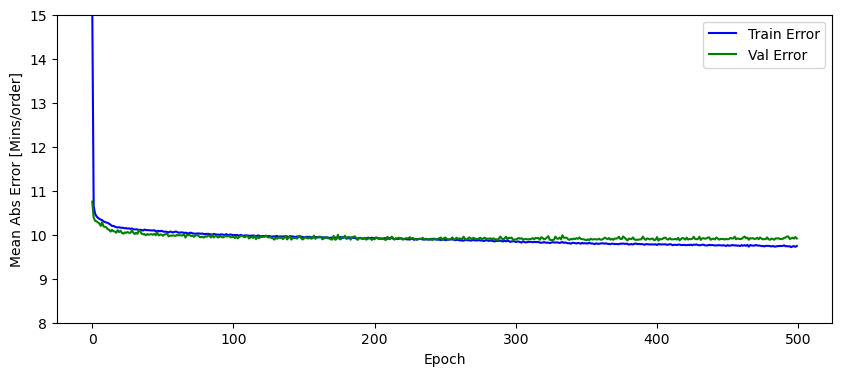

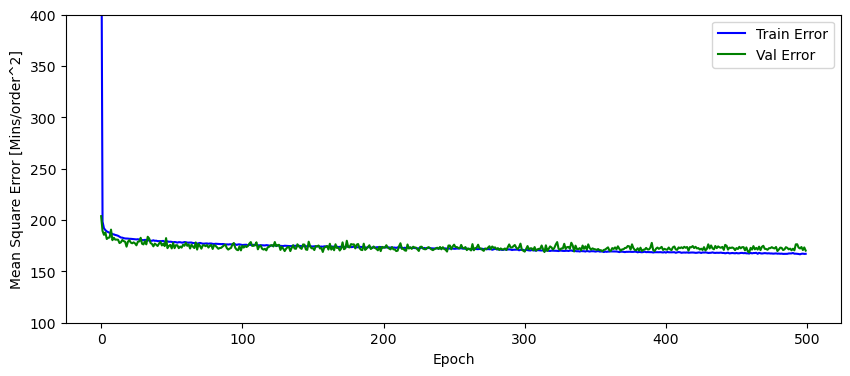

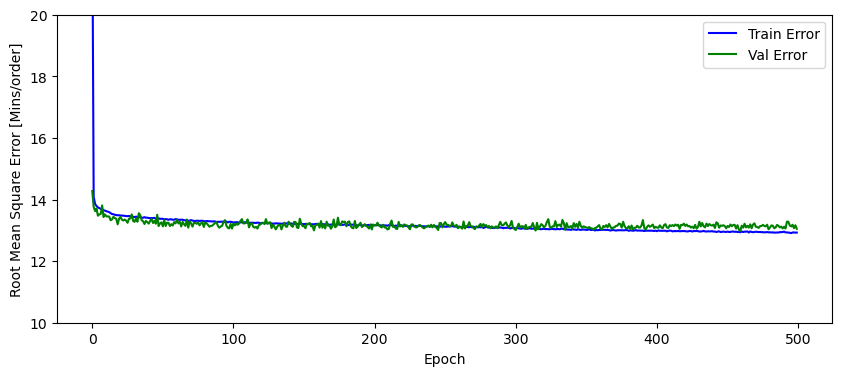

In [71]:

# plotting errors
plot_history(history)

***_Plotting Losses_***

---

**[Return to the index](#index)**

In [72]:
loss, mae, mse,mape = model.evaluate(X_test,y_test,verbose=0)

In [73]:
print(f'Testing set Mean Abs Error: {mae}','\n')
print(f'Testing set Mean Squared Error: {mse}','\n')
print(f'Testing set Mean Abs Percentage Error: {mape}')

Testing set Mean Abs Error: 10.049583435058594 

Testing set Mean Squared Error: 175.88148498535156 

Testing set Mean Abs Percentage Error: 23.096609115600586


In [74]:
y_pred_nn = model.predict(X_test)
metric(y_test, y_pred_nn)

611/611 [==============================] - 4s 6ms/step
test_r2_score : 0.32853992005327215 

adjusted_r2_score : 0.32795535399811293 

root_mean_squared_error : 13.262028284032782 

mean_absolute_percentage_error : 23.09660691129105 

mean_absolute_error : 10.049583223324841 



<a id='5.4'> </a>

## 5.4 Early Stopping ,Plotting Losses &  Model Predictions


...............................................

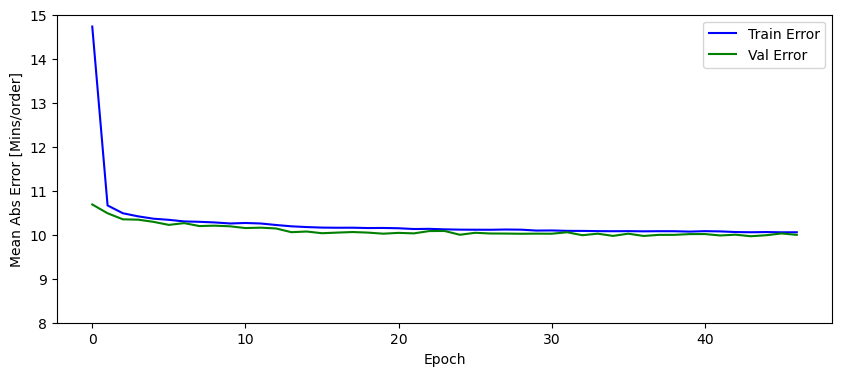

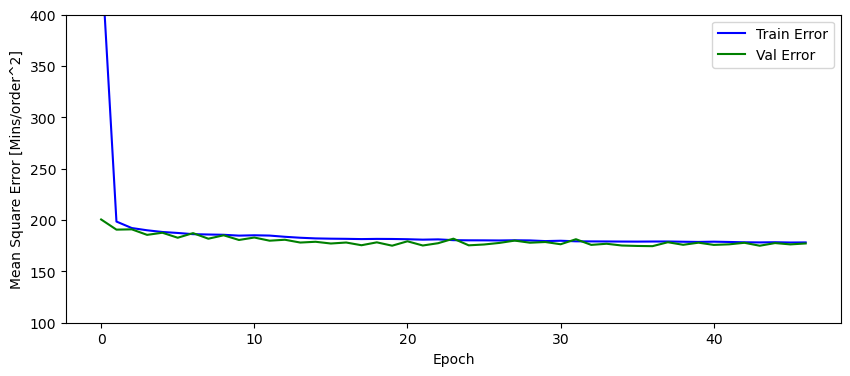

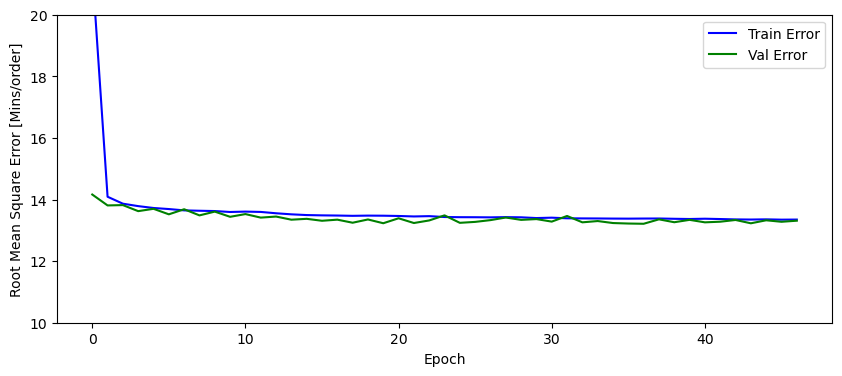

In [75]:
model1 = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

history1 = model1.fit(X_train, y_train,epochs=EPOCHS,
                   validation_split=0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history1)

***_Model Predictions_***

---

**[Return to the index](#index)**

<a id='5.5'> </a>

## 5.5 Model Predictions & Visualization of Prediction and Error

In [76]:
%%time

test_predictions = model.predict(X_test).flatten()

611/611 [==============================] - 3s 5ms/step
CPU times: total: 5.12 s
Wall time: 3.54 s


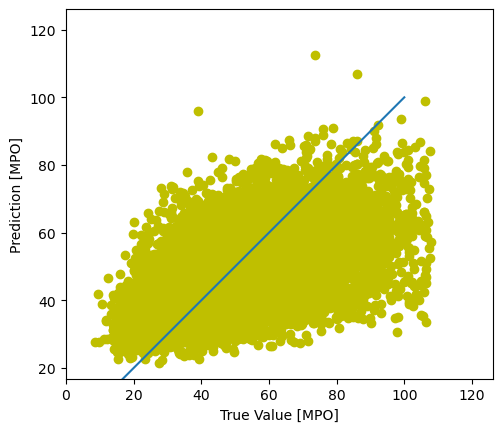

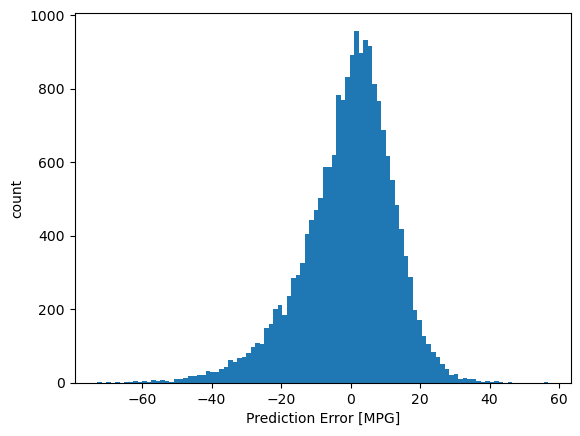

In [77]:

# Visualization of errors and relation between test_data and predictions 
plt.scatter(y_test[:len(test_predictions[test_predictions < 230])],
            test_predictions[test_predictions < 230],
            color='y',
            )

plt.xlabel('True Value [MPO]')
plt.ylabel('Prediction [MPO]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0, plt.xlim()[1]])
plt.xlim([0, plt.ylim()[1]])

_ = plt.plot([-100, 100],[-100, 100])
plt.show()


error = test_predictions - y_test
plt.hist(error, bins = 100)
plt.xlabel('Prediction Error [MPG]')
_=plt.ylabel('count')

**[Return to the index](#index)**

<a id='5.6'> </a>

# 5.6 Leading Questions:

### **Defining the problem statements and where can this and modifications of this be used?**

**The problem statement**  is that Porter, India's largest marketplace for intra-city logistics, wants to provide estimated delivery times to its customers for food orders from various restaurants. The challenge is to estimate the delivery time based on factors such as the order details, pickup location, and the availability of delivery partners, in order to meet customers' expectations and improve their overall experience.


**This can be used** by a range of businesses and industries such as food delivery, e-commerce, logistics and courier services, and transportation and ride-sharing services to estimate delivery times for their services. By using this approach to factor in variables such as restaurant location, traffic conditions, distance, and delivery partner availability, businesses can provide customers with more accurate and timely delivery estimates, manage customer expectations, and improve overall customer experience.

### **List 3 functions the pandas datetime provides with one line explanation.**

- to_datetime() - Convert string/timestamp to pandas datetime.

- date_range() - Generate fixed-frequency DatetimeIndex.

- strftime() - Format pandas datetime object into a string.

### **Short note on datetime, timedelta, time span (period)**

Datetime, timedelta, and time span (period) are all related to working with dates and times in Python.

- ***Datetime:*** A datetime object represents a point in time, and it includes both a date and a time. Datetime objects can be used for operations such as addition and subtraction, comparison, and formatting.



- ***Timedelta:*** A timedelta object represents a duration or difference between two points in time. Timedelta objects can be used to perform arithmetic operations on datetimes and to represent time intervals in units such as days, hours, and seconds.



- ***Time span (period):*** A period represents a range of time, such as a month, a year, or a quarter. In pandas, a period object can be created using a string representing a date or a frequency, such as 'M' for month or 'Q' for quarter. Period objects can be used for time-series analysis and data manipulation.

### **Name 3 outlier removal methods?**

```Supervised Learning Methods```

- IQR Method

- Z-score method

```Unsupervised Learning Methods```

- Isolation Forest Method

- Local Outlier Factor Method



### **What classical machine learning methods can we use other than random forest for regression?**

There are several classical machine learning methods that can be used for regression other than random forest. Here are a few examples:

- Linear Regression

- Support Vector Regression

- K-Nearest Neighbors Regression

- Gradient Boosting Regression

- Neural Network Regression

### **Why is scaling required for neural networks?**

Scaling, or rescaling the input features, is often required for neural networks to improve their performance and convergence during training. There are several reasons for this:



- ***Avoiding numerical instability:*** Neural networks use numerical computations to make predictions. If the input values are too large or too small, the computations can become unstable and lead to numerical errors. Rescaling the input features to a common scale can help to avoid this problem.






- ***Speeding up convergence:*** The optimization algorithms used in neural networks, such as gradient descent, work better when the input features are on a similar scale. Rescaling the features can help the algorithm converge faster and find a better set of weights.



- ***Improving generalization:*** Rescaling can help to reduce the impact of outliers or extreme values in the input data. This can improve the model's ability to generalize to new, unseen data.




- ***Enabling comparisons across features:*** If the input features have different scales, it can be difficult to compare their importance in the model. Rescaling the features to a common scale can make it easier to compare their relative importance.

Overall, rescaling the input features is an important step in the preprocessing of data for neural networks, and can help to improve the performance and accuracy of the model.

### **Briefly explain your choice of optimizer.**

Here are some reasons why i choose Adam as an optimizers:


- ***Adaptive learning rate:*** Adam adapts the learning rate for each parameter in the network, which helps to achieve better convergence and faster training times. This means that the learning rate can be automatically adjusted during training, rather than relying on manual tuning.




- **Momentum-based updates:*** Adam uses momentum to smooth the gradient updates and help the optimizer move in the direction of the optimum more efficiently. This can help to reduce the effect of noisy gradients and improve the convergence of the optimization process.




- ***Robustness to sparse gradients:*** Adam is known to perform well in settings where the gradients are sparse or the data is noisy. This is because it uses an adaptive learning rate that is customized for each parameter, and also keeps track of the second moment of the gradients. This helps to make the optimizer more robust to noisy or sparse data.




- ***Easy to implement:*** Adam is relatively easy to implement and does not require a lot of hyperparameter tuning. This makes it a popular choice for many deep learning tasks, especially when starting from a pre-trained model.

### **Which activation function did you use and why?**

```I choose swish as my activation function.```

Here are some reasons of choosing swish as my prefered activation function:

 - ***Smoothness:*** Unlike ReLU, Swish is a smooth function that is continuously differentiable, which can help to improve the stability and convergence of the optimization process. This is because smooth functions are less likely to cause gradient vanishing or explosion, and can be optimized more efficiently using gradient-based methods.



- ***Non-monotonicity:*** Swish is a non-monotonic function, which means that it can model more complex relationships between the input and output than monotonic functions such as ReLU. This can be especially useful for tasks that require more complex decision boundaries, such as image recognition or natural language processing.



- ***High performance:*** Swish has been shown to outperform ReLU and other popular activation functions in some deep learning tasks, such as image classification and language modeling. This is because Swish can learn more complex representations of the data, which can lead to improved accuracy and faster convergence.




- ***Computational efficiency:*** Swish can be computed efficiently using standard operations such as multiplication and addition, which makes it easy to implement in deep learning frameworks.

### **Why does a neural network perform well on a large dataset?**

```A large dataset can help a neural network to generalize better by allowing it to learn more diverse and representative patterns in the data. This can reduce the risk of overfitting and enable the network to make accurate predictions on new data. Additionally, a large dataset can increase the model capacity, allowing it to learn more complex patterns in the data. Finally, a large dataset can result in more accurate gradients for weight updates, which can improve the efficiency and effectiveness of the training process.```

**[Return to the index](#index)**

<a id='6'> </a>

# 6. Data clustering , Cluster Analysis  & Model Creation

<a id='6.1'> </a>

## 6.1 Import module & Data Pre-Processing 

In [78]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [79]:
df.head()

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time_targetvar,created_at_hour,created_at_day
0,1.0,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.98,22,6
1,2.0,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.07,21,10
2,3.0,f0ade77b43923b38237db569b016ba25,other,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.68,20,22
3,3.0,f0ade77b43923b38237db569b016ba25,other,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.25,21,3
4,3.0,f0ade77b43923b38237db569b016ba25,other,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.83,2,15


In [80]:
df1 = df.copy()

In [81]:
# Train test split

X = df.drop('delivery_time_targetvar',axis=1)
y = df.delivery_time_targetvar

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [82]:
encoder = ce.TargetEncoder(return_df=True)
X_train = encoder.fit_transform(X_train,y_train)
X_test = encoder.transform(X_test)
X_train['store_primary_category'] = round(X_train['store_primary_category'],2)

**[Return to the index](#index)**

<a id='6.2'> </a>

## 6.2  Elbow Method & Dividing data into multiple clusters 

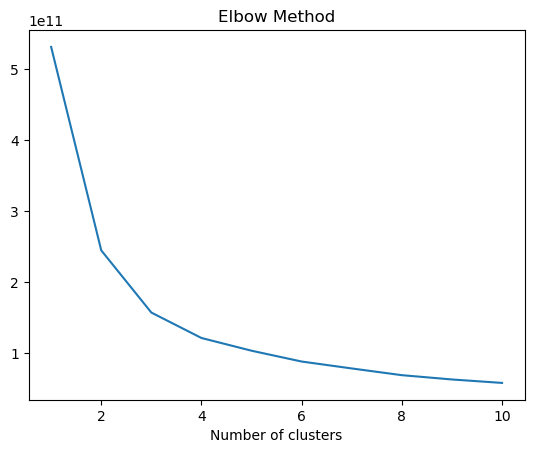

In [83]:
# Generate some random data
X, y = X_train,y_train

# Calculate the within-cluster sum of squares for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
fig, ax = plt.subplots()
ax.plot(range(1, 11), wcss)
ax.set_title('Elbow Method')
ax.set_xlabel('Number of clusters')
plt.show()

In [84]:
X_train.head()

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,created_at_hour,created_at_day
173995,2.0,44.115854,45.93,2.0,7,4905,3,445,845,83.0,83.0,163.0,2,2
66640,5.0,40.779275,46.93,2.0,3,2022,3,299,799,2.0,2.0,3.0,18,8
11590,2.0,41.440000,45.84,2.0,2,3050,1,1000,1000,42.0,44.0,55.0,20,12
86902,4.0,44.335190,47.54,3.0,2,1998,2,999,999,82.0,64.0,89.0,4,13
60194,5.0,49.432500,43.98,2.0,2,1575,2,650,925,10.0,5.0,5.0,1,14


In [117]:
from sklearn.manifold import TSNE

plt.figure(figsize=(10,7))
tsne = TSNE(n_components=2)
vis = tsne.fit_transform(iqr_X)


<Figure size 1000x700 with 0 Axes>

In [118]:
vis1 = vis.copy()
vis = np.array(pd.DataFrame(vis1).sample(10000))

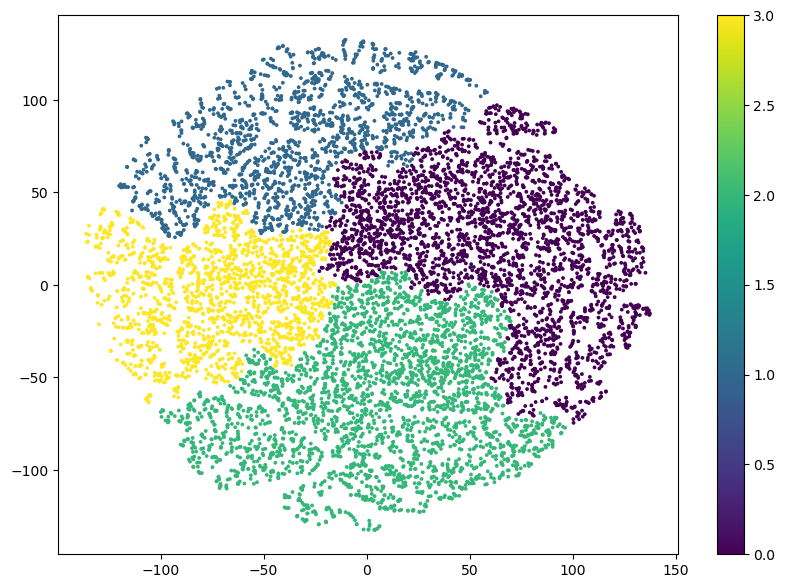

In [120]:
from sklearn.cluster import AgglomerativeClustering
aglo = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward').fit(vis)  #ds_scaled[:, :-1]
plt.figure(figsize=(10,7))
plt.scatter(vis[:,0], vis[:,1], s=3, c=aglo.labels_)
plt.colorbar();

In [89]:
# Generate random data with three clusters
X, y_true = X_train,y_train


# Use K-means to find the cluster labels
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
pd.Series(y_kmeans).unique()

array([2, 0, 3, 1])

In [90]:
X_train['Cluster'] = y_kmeans
X_test['Cluster'] = kmeans.predict(X_test)

In [91]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [92]:
train0 = train[train.Cluster == 0]
train1 = train[train.Cluster == 1]
train2 = train[train.Cluster == 2]
train3 = train[train.Cluster == 3]



test0 = test[test.Cluster == 0]
test1 = test[test.Cluster == 1]
test2 = test[test.Cluster == 2]
test3 = test[test.Cluster == 3]


**[Return to the index](#index)**

<a id='6.3'> </a>

## 6.3 Clustering-based Exploratory Data Analysis

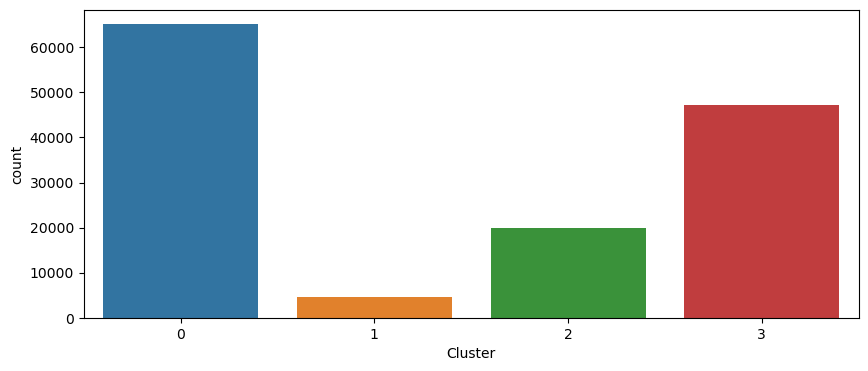

In [93]:
plt.figure(figsize=(10, 4))
sns.countplot(train.Cluster);


In [94]:
print('Cluster 0 Shape :',train0.shape,'\n')
print('Cluster 1 Shape :',train1.shape,'\n')
print('Cluster 2 Shape :',train2.shape,'\n')
print('Cluster 3 Shape :',train3.shape,'\n')

Cluster 0 Shape : (65103, 16) 

Cluster 1 Shape : (4611, 16) 

Cluster 2 Shape : (19897, 16) 

Cluster 3 Shape : (47201, 16) 



In [95]:
train0.describe(percentiles=[.05,.25,.50,.75,.95]).T

,count,mean,std,min,5%,25%,50%,75%,95%,max
market_id,65103.0,2.990861,1.556438,0.000000,1.000000,2.000000,3.000000,4.000000,6.000000,6.000000
store_id,65103.0,45.580958,6.754076,21.482904,36.269296,40.713030,44.893684,49.505161,57.696351,88.677745
store_primary_category,65103.0,46.308209,2.146566,41.710000,43.160000,44.000000,46.670000,47.280000,49.940000,57.000000
order_protocol,65103.0,2.975961,1.497837,0.000000,1.000000,1.000000,3.000000,4.000000,5.000000,7.000000
total_items,65103.0,2.239129,2.035722,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,84.000000
subtotal,65103.0,1380.679738,438.945388,0.000000,690.000000,1045.000000,1390.000000,1735.000000,2073.000000,2418.000000
num_distinct_items,65103.0,1.889160,1.013762,1.000000,1.000000,1.000000,2.000000,2.000000,4.000000,11.000000
min_item_price,65103.0,624.063499,408.244357,-52.000000,100.000000,275.000000,569.000000,899.000000,1399.000000,3391.000000
max_item_price,65103.0,873.356189,322.056007,0.000000,340.000000,675.000000,869.000000,1088.000000,1450.000000,3377.000000
total_onshift_partners,65103.0,40.157490,31.891130,-4.000000,3.000000,15.000000,32.000000,58.000000,106.000000,169.000000


In [96]:
train1.describe(percentiles=[.05,.25,.50,.75,.95]).T

,count,mean,std,min,5%,25%,50%,75%,95%,max
market_id,4611.0,2.893299,1.485688,0.000000,1.0000,2.00000,3.000000,4.000000,6.000000,6.000000
store_id,4611.0,49.231452,6.899219,28.751951,39.6141,44.40819,48.304091,53.383282,62.190208,80.326021
store_primary_category,4611.0,47.723314,2.125932,41.710000,43.9800,46.67000,47.280000,49.330000,50.590000,57.000000
order_protocol,4611.0,2.780742,1.471591,0.000000,1.0000,1.00000,3.000000,4.000000,5.000000,6.000000
total_items,4611.0,8.337888,3.981943,1.000000,3.5000,6.00000,8.000000,10.000000,15.000000,40.000000
subtotal,4611.0,8917.556062,1789.198120,6698.000000,7056.5000,7550.50000,8385.000000,9800.000000,12526.500000,24300.000000
num_distinct_items,4611.0,6.196704,2.533446,1.000000,2.0000,4.00000,6.000000,8.000000,11.000000,20.000000
min_item_price,4611.0,687.935806,715.556482,0.000000,150.0000,300.00000,525.000000,865.000000,1595.000000,14700.000000
max_item_price,4611.0,1864.961614,963.898232,257.000000,899.5000,1299.00000,1600.000000,2100.000000,3600.000000,14700.000000
total_onshift_partners,4611.0,52.046808,34.050585,-2.000000,6.0000,24.00000,48.000000,72.000000,118.000000,155.000000


In [97]:
train2.describe(percentiles=[.05,.25,.50,.75,.95]).T

,count,mean,std,min,5%,25%,50%,75%,95%,max
market_id,19897.0,2.930743,1.486512,0.000000,1.000000,2.000000,3.000000,4.000000,6.000000,6.000000
store_id,19897.0,48.728623,6.931694,28.751951,38.773333,43.970721,47.950246,52.825761,61.918508,88.166156
store_primary_category,19897.0,47.593319,2.121309,41.710000,43.980000,46.670000,47.280000,49.330000,50.540000,57.000000
order_protocol,19897.0,2.734432,1.507899,0.000000,1.000000,1.000000,3.000000,4.000000,5.000000,6.000000
total_items,19897.0,4.944162,2.294039,1.000000,2.000000,3.000000,5.000000,6.000000,9.000000,45.000000
subtotal,19897.0,4989.386289,808.020934,3648.000000,3997.000000,4305.000000,4800.000000,5550.000000,6580.000000,7015.000000
num_distinct_items,19897.0,4.113836,1.627832,1.000000,2.000000,3.000000,4.000000,5.000000,7.000000,17.000000
min_item_price,19897.0,729.941398,653.525859,0.000000,150.000000,325.000000,595.000000,900.000000,1700.000000,6595.000000
max_item_price,19897.0,1607.849425,685.593366,185.000000,870.000000,1195.000000,1470.000000,1800.000000,2900.000000,6595.000000
total_onshift_partners,19897.0,52.635613,35.188830,-2.000000,6.000000,23.629025,47.000000,74.000000,119.200000,164.000000


In [98]:
train3.describe(percentiles=[.05,.25,.50,.75,.95]).T

,count,mean,std,min,5%,25%,50%,75%,95%,max
market_id,47201.0,2.954683,1.530634,0.000000,1.000000,2.000000,3.000000,4.000000,6.000000,6.000000
store_id,47201.0,47.485485,6.916159,25.091743,37.760952,42.649257,46.554375,51.469404,60.318421,88.677745
store_primary_category,47201.0,47.194227,2.145395,41.710000,43.920000,45.930000,47.010000,49.160000,50.540000,57.000000
order_protocol,47201.0,2.782526,1.532201,0.000000,1.000000,1.000000,3.000000,4.000000,5.000000,7.000000
total_items,47201.0,3.246330,1.834907,1.000000,1.000000,2.000000,3.000000,4.000000,6.000000,59.000000
subtotal,47201.0,2878.306667,519.391345,1825.000000,2150.000000,2443.000000,2816.000000,3290.000000,3795.000000,4080.000000
num_distinct_items,47201.0,2.779666,1.228980,1.000000,1.000000,2.000000,3.000000,3.000000,5.000000,15.000000
min_item_price,47201.0,753.594161,567.685254,-13.000000,150.000000,325.000000,600.000000,1000.000000,1900.000000,3600.000000
max_item_price,47201.0,1296.121798,461.567683,119.000000,700.000000,995.000000,1200.000000,1499.000000,2195.000000,3699.000000
total_onshift_partners,47201.0,47.730347,34.024749,-2.000000,5.000000,20.000000,41.000000,68.403444,116.000000,162.000000


---

***_Describe on all 4 clusters_***


----

**[Return to the index](#index)**

<a id='6.4'> </a>
   
## 6.4 Hyperparameter Tuning , Building Architechture & Fitting Data 

In [99]:
# Hyper-params of NN

batch_size = 10000
hidden_units = 256 
input_size = X_train.shape[1]

In [100]:
# Model Architechture

model = Sequential()
model.add(Dense(hidden_units,input_dim=14))
model.add(Activation('relu'))
model.add(Dropout(.2))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(.1))
model.add(Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 256)               3840      
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_25 (Dense)            (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_26 (Dense)            (None, 1)                

In [101]:
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(loss='mse',optimizer=optimizer,metrics=['mae','mape'])

In [102]:
%%time

X_train0 = train0.drop(['Cluster','delivery_time_targetvar'],axis=1)
y_train0 = train0['delivery_time_targetvar']
X_test0 = test0.drop(['Cluster','delivery_time_targetvar'],axis=1)
y_test0 = test0['delivery_time_targetvar']



model.fit(X_train0,y_train0,epochs=20,batch_size=batch_size)

Epoch 1/20
7/7 [==============================] - 2s 164ms/step - loss: 814762.4375 - mae: 618.6669 - mape: 1588.2850
Epoch 2/20
7/7 [==============================] - 1s 194ms/step - loss: 19088.7852 - mae: 118.5750 - mape: 291.7779
Epoch 3/20
7/7 [==============================] - 1s 185ms/step - loss: 1463.2916 - mae: 33.6647 - mape: 74.2634
Epoch 4/20
7/7 [==============================] - 1s 175ms/step - loss: 592.1708 - mae: 19.0727 - mape: 47.6877
Epoch 5/20
7/7 [==============================] - 1s 177ms/step - loss: 495.5122 - mae: 17.0900 - mape: 38.2677
Epoch 6/20
7/7 [==============================] - 1s 174ms/step - loss: 439.6736 - mae: 16.3389 - mape: 39.7159
Epoch 7/20
7/7 [==============================] - 1s 178ms/step - loss: 405.9548 - mae: 15.6053 - mape: 37.6159
Epoch 8/20
7/7 [==============================] - 1s 188ms/step - loss: 379.3745 - mae: 15.0386 - mape: 36.4280
Epoch 9/20
7/7 [==============================] - 1s 205ms/step - loss: 355.4477 - mae: 14.57

In [103]:
%%time

X_train1 = train1.drop(['Cluster','delivery_time_targetvar'],axis=1)
y_train1 = train1['delivery_time_targetvar']
X_test1 = test1.drop(['Cluster','delivery_time_targetvar'],axis=1)
y_test1 = test1['delivery_time_targetvar']

model.fit(X_train1,y_train1,epochs=20,batch_size=batch_size)

Epoch 1/20
1/1 [==============================] - 0s 121ms/step - loss: 13524.1943 - mae: 107.2523 - mape: 205.2537
Epoch 2/20
1/1 [==============================] - 0s 120ms/step - loss: 2028.0668 - mae: 37.1587 - mape: 73.2441
Epoch 3/20
1/1 [==============================] - 0s 125ms/step - loss: 823.8047 - mae: 22.7555 - mape: 38.4256
Epoch 4/20
1/1 [==============================] - 0s 116ms/step - loss: 2077.1604 - mae: 40.1567 - mape: 67.4269
Epoch 5/20
1/1 [==============================] - 0s 129ms/step - loss: 2481.7910 - mae: 44.9065 - mape: 75.7704
Epoch 6/20
1/1 [==============================] - 0s 129ms/step - loss: 2130.3638 - mae: 41.5399 - mape: 69.6523
Epoch 7/20
1/1 [==============================] - 0s 138ms/step - loss: 1979.3533 - mae: 39.9471 - mape: 66.9098
Epoch 8/20
1/1 [==============================] - 0s 125ms/step - loss: 1789.0310 - mae: 37.4277 - mape: 62.3983
Epoch 9/20
1/1 [==============================] - 0s 122ms/step - loss: 1416.9067 - mae: 32.15

In [104]:
%%time

X_train2 = train2.drop(['Cluster','delivery_time_targetvar'],axis=1)
y_train2 = train2['delivery_time_targetvar']
X_test2 = test2.drop(['Cluster','delivery_time_targetvar'],axis=1)
y_test2 = test2['delivery_time_targetvar']


model.fit(X_train2,y_train2,epochs=20,batch_size=batch_size)

Epoch 1/20
2/2 [==============================] - 0s 190ms/step - loss: 988.8245 - mae: 26.0330 - mape: 46.5522
Epoch 2/20
2/2 [==============================] - 0s 207ms/step - loss: 952.3834 - mae: 25.2642 - mape: 45.0479
Epoch 3/20
2/2 [==============================] - 0s 210ms/step - loss: 834.3819 - mae: 23.0152 - mape: 40.9888
Epoch 4/20
2/2 [==============================] - 0s 213ms/step - loss: 695.2077 - mae: 20.4537 - mape: 36.8939
Epoch 5/20
2/2 [==============================] - 0s 196ms/step - loss: 569.5900 - mae: 18.2508 - mape: 34.2375
Epoch 6/20
2/2 [==============================] - 0s 198ms/step - loss: 512.3030 - mae: 17.4642 - mape: 34.7094
Epoch 7/20
2/2 [==============================] - 0s 205ms/step - loss: 537.4176 - mae: 18.3729 - mape: 38.4645
Epoch 8/20
2/2 [==============================] - 0s 200ms/step - loss: 568.7076 - mae: 19.0999 - mape: 41.1755
Epoch 9/20
2/2 [==============================] - 0s 205ms/step - loss: 591.3109 - mae: 19.5470 - mape: 

In [105]:
%%time

X_train3 = train3.drop(['Cluster','delivery_time_targetvar'],axis=1)
y_train3 = train3['delivery_time_targetvar']
X_test3 = test3.drop(['Cluster','delivery_time_targetvar'],axis=1)
y_test3 = test3['delivery_time_targetvar']


model.fit(X_train3,y_train3,epochs=20,batch_size=batch_size)

Epoch 1/20
5/5 [==============================] - 1s 163ms/step - loss: 599.2220 - mae: 18.9817 - mape: 36.6573
Epoch 2/20
5/5 [==============================] - 1s 167ms/step - loss: 452.6793 - mae: 16.7615 - mape: 37.5854
Epoch 3/20
5/5 [==============================] - 1s 164ms/step - loss: 439.5973 - mae: 16.3817 - mape: 35.8955
Epoch 4/20
5/5 [==============================] - 1s 169ms/step - loss: 454.1176 - mae: 16.5337 - mape: 35.5770
Epoch 5/20
5/5 [==============================] - 1s 180ms/step - loss: 449.6302 - mae: 16.5130 - mape: 35.7109
Epoch 6/20
5/5 [==============================] - 1s 194ms/step - loss: 442.3241 - mae: 16.3777 - mape: 35.5765
Epoch 7/20
5/5 [==============================] - 1s 202ms/step - loss: 427.3353 - mae: 16.1533 - mape: 35.7076
Epoch 8/20
5/5 [==============================] - 1s 199ms/step - loss: 405.5748 - mae: 15.9718 - mape: 36.6863
Epoch 9/20
5/5 [==============================] - 1s 206ms/step - loss: 371.0871 - mae: 15.0758 - mape: 

**[Return to the index](#index)**

## -----------------------------------------------------END-------------------------------------------------------------------